In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img ,img_to_array ,ImageDataGenerator
import numpy as np
import os
import  warnings
warnings.filterwarnings('ignore')
from skimage.transform import resize
from sklearn.preprocessing import  LabelEncoder
from sklearn.utils import shuffle
import tensorflow as tf
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import plot_roc_curve

from tensorflow.keras.layers import  Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras import Sequential
from sklearn.metrics import  confusion_matrix,f1_score
from tensorflow.keras.layers import Dropout,BatchNormalization,Flatten
from tensorflow.keras.regularizers import L2
from sklearn import svm
from sklearn.metrics import  accuracy_score , classification_report

In [2]:
Chihuahua = os.listdir("E:\project _dogs\image_after_COP\Chihuahua")
Japanese_spaniel = os.listdir("E:\project _dogs\image_after_COP\Japanese_spaniel")
Maltese_dog = os.listdir("E:\project _dogs\image_after_COP\Maltese_dog")

Pekinese = os.listdir("E:\project _dogs\image_after_COP\Pekinese")
Shih_Tzu = os.listdir("E:\project _dogs\image_after_COP\Shih-Tzu")
Blenheim_spaniel = os.listdir("E:\project _dogs\image_after_COP\Blenheim_spaniel")

papillon = os.listdir("E:\project _dogs\image_after_COP\papillon")
toy_terrier = os.listdir("E:\project _dogs\image_after_COP/toy_terrier")
Rhodesian_ridgeback = os.listdir("E:\project _dogs\image_after_COP\Rhodesian_ridgeback/")
Afghan_hound = os.listdir("E:\project _dogs\image_after_COP\Afghan_hound")


In [3]:
len(Chihuahua) , len(Japanese_spaniel),len(Maltese_dog),len(Pekinese),len(Shih_Tzu),len(Blenheim_spaniel),len(papillon),len(toy_terrier),len(Rhodesian_ridgeback),len(Afghan_hound)
#### so many data we need to agument the data

(170, 185, 160, 149, 214, 168, 194, 161, 155, 238)

In [4]:
def split(dir):
    train = []
    val = []
    test = []
    for i in range(145):
        if i <90:
            train.append(dir[i])
        elif i >= 90 and i < 120 :
            val.append(dir[i])
        else:
            test.append(dir[i])
    return train , val ,test

In [5]:
Chihuahua_train,Chihuahua_val,Chihuahua_test = split(Chihuahua)
Japanese_spaniel_train,Japanese_spaniel_val,Japanese_spaniel_test = split(Japanese_spaniel)
Maltese_dog_train,Maltese_dog_val,Maltese_dog_test =split(Maltese_dog)

Pekinese_train,Pekinese_val,Pekinese_test = split(Pekinese)
Shih_Tzu_train,Shih_Tzu_val,Shih_Tzu_test = split(Shih_Tzu)
Blenheim_spaniel_train ,Blenheim_spaniel_val,Blenheim_spaniel_test =split(Blenheim_spaniel)
papillon_train,papillon_val,papillon_test =split(papillon)
toy_terrier_train,toy_terrier_val,toy_terrier_test=split(toy_terrier)
Rhodesian_ridgeback_train ,Rhodesian_val ,Rhodesian_ridgeback_test = split(Rhodesian_ridgeback)
Afghan_hound_train ,Afghan_hound_val,Afghan_hound_test = split(Afghan_hound)

In [6]:
len(Afghan_hound_val)

30

### Data agumentation

In [7]:
### Data Agumintaion
Agum = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

def Agument(dir,name,path,PATH):
    for i in range(len(dir)):
        img = load_img(path+dir[i])
        img_array = img_to_array(img)
        img_array = img_array.reshape((1,)+img_array.shape)
        j = 0
        for x in Agum.flow(img_array,save_to_dir=PATH,batch_size=90,save_prefix=name,save_format='jpg'):
            j+=1
            if j > 20:
                break


In [8]:
### Dont run it
Agument(Chihuahua_train,'Chihuahua',"E:\project _dogs\image_after_COP\Chihuahua/","E:\project _dogs\Agumented\Chihuahua")
Agument(Japanese_spaniel_train, 'Japanese_spaniel', "E:\project _dogs\image_after_COP\Japanese_spaniel/","E:\project _dogs\Agumented\Japanese_spaniel")
Agument(Maltese_dog_train, 'Maltese_dog', "E:\project _dogs\image_after_COP\Maltese_dog/","E:\project _dogs\Agumented\Maltese_dog")
Agument(Pekinese_train, 'Pekinese', "E:\project _dogs\image_after_COP\Pekinese/","E:\project _dogs\Agumented\Pekinese")
Agument(Shih_Tzu_train, "Shih_Tzu", "E:\project _dogs\image_after_COP\Shih-Tzu/","E:\project _dogs\Agumented\Shih-Tzu")
Agument(Blenheim_spaniel_train, "Blenheim_spaniel","E:\project _dogs\image_after_COP\Blenheim_spaniel/","E:\project _dogs\Agumented\Blenheim_spaniel")
Agument(papillon_train, 'papillon', "E:\project _dogs\image_after_COP\papillon/","E:\project _dogs\Agumented\papillon")
Agument(toy_terrier_train, "toy_terrier", "E:\project _dogs\image_after_COP/toy_terrier/","E:\project _dogs\Agumented/toy_terrier")
Agument(Rhodesian_ridgeback_train, 'Rhodesian_ridgeback', "E:\project _dogs\image_after_COP\Rhodesian_ridgeback/",
        "E:\project _dogs\Agumented\Rhodesian_ridgeback")
Agument(Afghan_hound_train, 'Afghan_hound', "E:\project _dogs\image_after_COP\Afghan_hound/","E:\project _dogs\Agumented\Afghan_hound")


### load  the data and process the data

In [9]:
train_label = []
train_data = []
def images(name,l,path,data,label):
    for i in range(len(name)):
        img = load_img(path+name[i],target_size=(28,28,3))
        img_array = img_to_array(img)
        img_array=img_array.reshape(28,28,3)
        '''ravel = np.ravel(img_array)'''
        img_array = img_array
        data.append(img_array)
        label.append(l)



In [10]:
Chihuahua_A = os.listdir("E:\project _dogs\Agumented\Chihuahua")
Japanese_spaniel_A = os.listdir("E:\project _dogs\Agumented\Japanese_spaniel")
Maltese_dog_A = os.listdir("E:\project _dogs\Agumented\Maltese_dog")
Pekinese_A =os.listdir("E:\project _dogs\Agumented\Pekinese")
Shih_Tzu_A = os.listdir("E:\project _dogs\Agumented\Shih-Tzu")
Blenheim_spaniel_A = os.listdir("E:\project _dogs\Agumented\Blenheim_spaniel")
papillon_A = os.listdir("E:\project _dogs\Agumented\papillon")
toy_terrier_A = os.listdir("E:\project _dogs\Agumented/toy_terrier")
Rhodesian_ridgeback_A = os.listdir("E:\project _dogs\Agumented\Rhodesian_ridgeback")
Afghan_hound_A = os.listdir("E:\project _dogs\Agumented\Afghan_hound")


In [11]:
len(Japanese_spaniel_A)

1710

In [12]:
images(Chihuahua_A,0,"E:\project _dogs\Agumented\Chihuahua/",train_data,train_label)
images(Japanese_spaniel_A,1,"E:\project _dogs\Agumented\Japanese_spaniel/",train_data,train_label)
images(Maltese_dog_A,2,"E:\project _dogs\Agumented\Maltese_dog/",train_data,train_label)
images(Pekinese_A,3,"E:\project _dogs\Agumented\Pekinese/",train_data,train_label)
images(Shih_Tzu_A,4,"E:\project _dogs\Agumented\Shih-Tzu/",train_data,train_label)
images(Blenheim_spaniel_A,5,"E:\project _dogs\Agumented\Blenheim_spaniel/",train_data,train_label)
images(papillon_A,6,"E:\project _dogs\Agumented\papillon/",train_data,train_label)
images(toy_terrier_A,7,"E:\project _dogs\Agumented/toy_terrier/",train_data,train_label)
images(Rhodesian_ridgeback_A,8,"E:\project _dogs\Agumented\Rhodesian_ridgeback/",train_data,train_label)
images(Afghan_hound_A,9,"E:\project _dogs\Agumented\Afghan_hound/",train_data,train_label)


In [13]:
train_label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [14]:
#processing the answers

train_data =np.array(train_data)
train_label = np.array(train_label)
train_data , train_label=shuffle(train_data,train_label)

In [15]:
train_label.shape

(17209,)

### valdiation

In [16]:
val_data= []
val_label = []
images(Chihuahua_val,0,"E:\project _dogs\image_after_COP\Chihuahua/",val_data,val_label)
images(Japanese_spaniel_val,1,"E:\project _dogs\image_after_COP\Japanese_spaniel/",val_data,val_label)
images(Maltese_dog_val,2,"E:\project _dogs\image_after_COP\Maltese_dog/",val_data,val_label)
images(Pekinese_val,3,"E:\project _dogs\image_after_COP\Pekinese/",val_data,val_label)
images(Shih_Tzu_val,4,"E:\project _dogs\image_after_COP\Shih-Tzu/",val_data,val_label)
images(Blenheim_spaniel_val,5,"E:\project _dogs\image_after_COP\Blenheim_spaniel/",val_data,val_label)
images(papillon_val,6,"E:\project _dogs\image_after_COP\papillon/",val_data,val_label)
images(toy_terrier_val,7,"E:\project _dogs\image_after_COP/toy_terrier/",val_data,val_label)
images(Rhodesian_val,8,"E:\project _dogs\image_after_COP\Rhodesian_ridgeback/",val_data,val_label)
images(Afghan_hound_val,9,"E:\project _dogs\image_after_COP\Afghan_hound/",val_data,val_label)


len(val_data),len(val_label)

(300, 300)

In [17]:

val_data =np.array(val_data)
val_label = np.array(val_label)
val_data,val_label = shuffle(val_data,val_label)


### test

In [18]:
test_data = []
test_label = []

images(Chihuahua_test,0,"E:\project _dogs\image_after_COP\Chihuahua/",test_data,test_label)
images(Japanese_spaniel_test,1,"E:\project _dogs\image_after_COP\Japanese_spaniel/",test_data,test_label)
images(Maltese_dog_test,2,"E:\project _dogs\image_after_COP\Maltese_dog/",test_data,test_label)
images(Pekinese_test,3,"E:\project _dogs\image_after_COP\Pekinese/",test_data,test_label)
images(Shih_Tzu_test,4,"E:\project _dogs\image_after_COP\Shih-Tzu/",test_data,test_label)
images(Blenheim_spaniel_test,5,"E:\project _dogs\image_after_COP\Blenheim_spaniel/",test_data,test_label)
images(papillon_test,6,"E:\project _dogs\image_after_COP\papillon/",test_data,test_label)
images(toy_terrier_test,7,"E:\project _dogs\image_after_COP/toy_terrier/",test_data,test_label)
images(Rhodesian_ridgeback_test,8,"E:\project _dogs\image_after_COP\Rhodesian_ridgeback/",test_data,test_label)
images(Afghan_hound_test,9,"E:\project _dogs\image_after_COP\Afghan_hound/",test_data,test_label)


test_data =np.array(test_data)
test_label = np.array(test_label)
test_data,test_label = shuffle(test_data,test_label)

In [19]:
test_data.shape

(250, 28, 28, 3)

In [20]:
val_data.shape

(300, 28, 28, 3)

In [21]:
model = Sequential()
model.add(Flatten(input_shape=[28, 28,3]))


model.add(Dense(300, activation="relu"))

model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(10, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(10, activation="softmax"))
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2352)              0         
                                                                 
 dense (Dense)               (None, 300)               705900    
                                                                 
 batch_normalization (BatchN  (None, 300)              1200      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                3010      
                                                                 
 batch_normalization_1 (Batc  (None, 10)               40        
 hNormalization)                                        

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [24]:
history = model.fit(train_data, train_label, epochs=30,
                    validation_data=(val_data, val_label))

Epoch 1/30
538/538 [==============================] - 8s 11ms/step - loss: 2.2674 - accuracy: 0.1897 - val_loss: 2.1561 - val_accuracy: 0.2167
Epoch 2/30
538/538 [==============================] - 5s 10ms/step - loss: 2.0895 - accuracy: 0.2357 - val_loss: 2.0326 - val_accuracy: 0.2767
Epoch 3/30
538/538 [==============================] - 5s 10ms/step - loss: 2.0522 - accuracy: 0.2550 - val_loss: 1.9970 - val_accuracy: 0.3100
Epoch 4/30
538/538 [==============================] - 5s 9ms/step - loss: 2.0461 - accuracy: 0.2582 - val_loss: 2.0004 - val_accuracy: 0.2800
Epoch 5/30
538/538 [==============================] - 5s 10ms/step - loss: 2.0329 - accuracy: 0.2640 - val_loss: 2.0045 - val_accuracy: 0.2800
Epoch 6/30
538/538 [==============================] - 5s 9ms/step - loss: 2.0327 - accuracy: 0.2590 - val_loss: 1.9474 - val_accuracy: 0.2967
Epoch 7/30
538/538 [==============================] - 5s 10ms/step - loss: 2.0211 - accuracy: 0.2699 - val_loss: 2.0091 - val_accuracy: 0.2833
E

In [25]:
x ,y= model.evaluate(test_data,test_label)

8/8 [==============================] - 0s 2ms/step - loss: 1.9834 - accuracy: 0.2960


### confusion matrics

In [26]:
predictions = model.predict_generator(test_data,steps=1,verbose=0)
rounded_prediction = np.argmax(predictions, axis=-1)


In [27]:
cm = confusion_matrix(y_true=test_label, y_pred=rounded_prediction)

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 2  3  5  1  0  5  3  1  5  0]
 [ 0 10  5  0  3  1  6  0  0  0]
 [ 0  3 18  0  1  0  0  1  0  2]
 [ 2  3  3  1  0  3  2  3  6  2]
 [ 1  5  8  1  2  2  1  1  1  3]
 [ 0  4  6  0  0  7  2  1  4  1]
 [ 0  7  0  0  1  3  7  3  2  2]
 [ 0  5  2  0  2  1 10  2  1  2]
 [ 0  0  1  3  0  2  0  1 17  1]
 [ 0  2  3  0  0  4  0  5  3  8]]


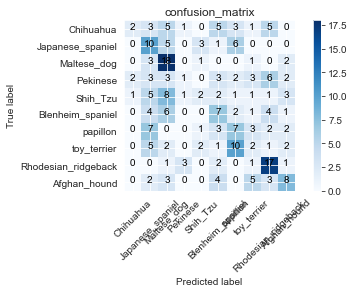

In [29]:
cm_plot_labels = ["Chihuahua", 'Japanese_spaniel', 'Maltese_dog', 'Pekinese','Shih_Tzu','Blenheim_spaniel','papillon','toy_terrier','Rhodesian_ridgeback','Afghan_hound']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion_matrix')

In [30]:
print(classification_report(test_label,rounded_prediction, target_names=cm_plot_labels))

                     precision    recall  f1-score   support

          Chihuahua       0.40      0.08      0.13        25
   Japanese_spaniel       0.24      0.40      0.30        25
        Maltese_dog       0.35      0.72      0.47        25
           Pekinese       0.17      0.04      0.06        25
           Shih_Tzu       0.22      0.08      0.12        25
   Blenheim_spaniel       0.25      0.28      0.26        25
           papillon       0.23      0.28      0.25        25
        toy_terrier       0.11      0.08      0.09        25
Rhodesian_ridgeback       0.44      0.68      0.53        25
       Afghan_hound       0.38      0.32      0.35        25

           accuracy                           0.30       250
          macro avg       0.28      0.30      0.26       250
       weighted avg       0.28      0.30      0.26       250



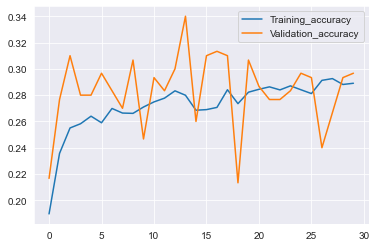

In [31]:
accs = history.history['accuracy']
val_accs = history.history['val_accuracy']

plt.plot(range(len(accs)),accs, label = 'Training_accuracy')
plt.plot(range(len(accs)),val_accs, label = 'Validation_accuracy')
plt.legend()
plt.show()

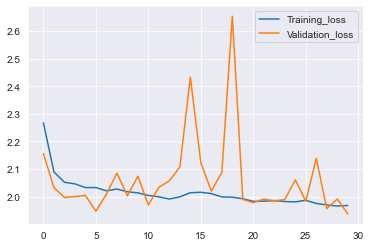

In [32]:
accs = history.history['loss']
val_accs = history.history['val_loss']

plt.plot(range(len(accs)),accs, label = 'Training_loss')
plt.plot(range(len(accs)),val_accs, label = 'Validation_loss')
plt.legend()
plt.show()

### CNN Model

In [33]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=(28, 28,3),kernel_regularizer=L2(0.01)))
model.add(BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 14, 14, 64)      

In [34]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()
history = model.fit(train_data, train_label, epochs=30,
                    validation_data=(val_data, val_label))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 14, 14, 64)      

In [35]:
model.evaluate(test_data, test_label)

8/8 [==============================] - 0s 10ms/step - loss: 1.8037 - accuracy: 0.5280


[1.803717851638794, 0.527999997138977]

In [36]:
predictions = model.predict_generator(test_data,steps=1,verbose=0)
rounded_prediction = np.argmax(predictions, axis=-1)


In [37]:
cm = confusion_matrix(y_true=test_label, y_pred=rounded_prediction)

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[11  0  2  3  2  3  3  0  1  0]
 [ 1 14  0  1  0  0  9  0  0  0]
 [ 2  0 15  3  4  1  0  0  0  0]
 [ 3  2  2 11  3  0  0  1  2  1]
 [ 4  2  1  3  9  1  1  2  0  2]
 [ 1  2  1  0  0 19  2  0  0  0]
 [ 2  7  0  0  1  3 11  1  0  0]
 [ 4  2  1  0  0  0  6  8  2  2]
 [ 3  0  0  0  0  0  0  0 19  3]
 [ 1  0  2  2  1  0  1  2  1 15]]


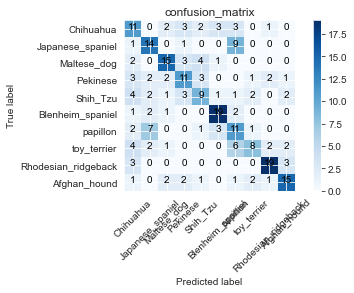

In [39]:
cm_plot_labels = ["Chihuahua", 'Japanese_spaniel', 'Maltese_dog', 'Pekinese','Shih_Tzu','Blenheim_spaniel','papillon','toy_terrier','Rhodesian_ridgeback','Afghan_hound']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion_matrix')

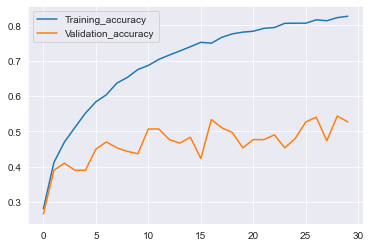

In [40]:
accs = history.history['accuracy']
val_accs = history.history['val_accuracy']

plt.plot(range(len(accs)),accs, label = 'Training_accuracy')
plt.plot(range(len(accs)),val_accs, label = 'Validation_accuracy')
plt.legend()
plt.show()

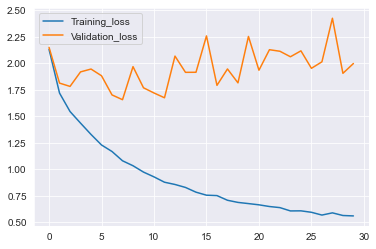

In [41]:
accs = history.history['loss']
val_accs = history.history['val_loss']

plt.plot(range(len(accs)),accs, label = 'Training_loss')
plt.plot(range(len(accs)),val_accs, label = 'Validation_loss')
plt.legend()
plt.show()

In [42]:
print(classification_report(test_label,rounded_prediction, target_names=cm_plot_labels))

                     precision    recall  f1-score   support

          Chihuahua       0.34      0.44      0.39        25
   Japanese_spaniel       0.48      0.56      0.52        25
        Maltese_dog       0.62      0.60      0.61        25
           Pekinese       0.48      0.44      0.46        25
           Shih_Tzu       0.45      0.36      0.40        25
   Blenheim_spaniel       0.70      0.76      0.73        25
           papillon       0.33      0.44      0.38        25
        toy_terrier       0.57      0.32      0.41        25
Rhodesian_ridgeback       0.76      0.76      0.76        25
       Afghan_hound       0.65      0.60      0.63        25

           accuracy                           0.53       250
          macro avg       0.54      0.53      0.53       250
       weighted avg       0.54      0.53      0.53       250



In [43]:
rounded_prediction.shape

(250,)

### Supported vector classsifier

In [44]:
test_data.shape

(250, 28, 28, 3)

In [45]:
train_data.shape

(17209, 28, 28, 3)

In [46]:
train = train_data.reshape(22478,2352)

ValueError: cannot reshape array of size 40475568 into shape (22478,2352)

In [ ]:
test = test_data.reshape(250,2352)

In [ ]:
clf = svm.SVC()
clf.fit(train,train_label)

In [ ]:
pred  = clf.predict(test)
acc = accuracy_score(y_pred=pred,y_true=test_label)
acc

In [ ]:
cm = confusion_matrix(y_true=test_label, y_pred=pred)

In [ ]:
cm_plot_labels = ["Chihuahua", 'Japanese_spaniel', 'Maltese_dog', 'Pekinese','Shih_Tzu','Blenheim_spaniel','papillon','toy_terrier','Rhodesian_ridgeback','Afghan_hound']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion_matrix')

In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


In [ ]:
multiclass_roc_auc_score(y_pred=pred,y_test=test_label)

In [ ]:
print(classification_report(test_label,pred, target_names=cm_plot_labels))